# Time Series Analysis with Facebook Prophet

Follow along by using a jupyter notebook, otherwise I suggest using [Google Colab](https://colab.research.google.com/) for a prebuilt environment.

## Load Libraries

Install the prophet and pandas libraries by using pip install

In [ ]:
# pip install prophet
# pip install pandas

In [1]:
import pandas as pd
from prophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [3]:
df = pd.read_csv('BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


### Format the Data

In [5]:
df.columns = ['ds','y']

In [6]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [7]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

12:07:06 - cmdstanpy - INFO - Chain [1] start processing
12:07:07 - cmdstanpy - INFO - Chain [1] done processing


## Forecasting

### Step 1: Create "future" placeholder dataframe

**Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [8]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [9]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [10]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [11]:
len(df)

324

In [12]:
len(future)

348


### Step 2: Predict and fill in the Future

In [13]:
forecast = m.predict(future)

In [14]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.898400,1149.818904,1474.689490,1772.898400,1772.898400,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,-461.854666,0.0,0.0,0.0,1311.043734
1,1992-02-01,1775.730691,1183.362939,1513.567167,1775.730691,1775.730691,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,-427.558972,0.0,0.0,0.0,1348.171720
2,1992-03-01,1778.380254,1437.322227,1754.979024,1778.380254,1778.380254,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,-179.202384,0.0,0.0,0.0,1599.177870
3,1992-04-01,1781.212546,1426.163922,1744.199835,1781.212546,1781.212546,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,-196.248666,0.0,0.0,0.0,1584.963880
4,1992-05-01,1783.953473,1664.207558,1984.650892,1783.953473,1783.953473,45.147907,45.147907,45.147907,45.147907,45.147907,45.147907,0.0,0.0,0.0,1829.101380


In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5200.713315,5085.979644,5404.087431,5188.549387,5212.190450,40.246355,40.246355,40.246355,40.246355,40.246355,40.246355,0.0,0.0,0.0,5240.959670
344,2020-09-01,5216.783409,4934.113251,5246.176433,5203.678994,5229.263836,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,-132.916603,0.0,0.0,0.0,5083.866806
345,2020-10-01,5232.335113,5026.509515,5356.537736,5217.891797,5245.840012,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,-43.289567,0.0,0.0,0.0,5189.045546
346,2020-11-01,5248.405207,5176.410958,5504.785198,5232.990925,5263.067939,86.826365,86.826365,86.826365,86.826365,86.826365,86.826365,0.0,0.0,0.0,5335.231572
347,2020-12-01,5263.956911,6184.679934,6508.709771,5247.369830,5279.632646,1071.399576,1071.399576,1071.399576,1071.399576,1071.399576,1071.399576,0.0,0.0,0.0,6335.356487


In [16]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4628.441552,4465.143953,4779.090755
337,2020-02-01,4678.807340,4516.208108,4835.722396
338,2020-03-01,4942.197241,4779.508281,5091.557176
339,2020-04-01,4941.221054,4782.970144,5107.898911
340,2020-05-01,5198.169330,5038.420003,5355.691817
341,2020-06-01,5179.161700,5021.403697,5349.568669
342,2020-07-01,5311.678492,5144.394625,5482.541811
343,2020-08-01,5240.959670,5085.979644,5404.087431
344,2020-09-01,5083.866806,4934.113251,5246.176433
345,2020-10-01,5189.045546,5026.509515,5356.537736


### Plotting Forecast

We can use Prophet's own built in plotting tools

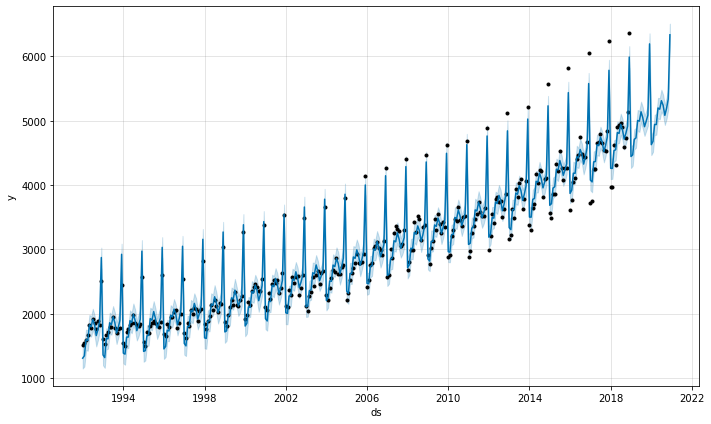

In [18]:
m.plot(forecast);

<AxesSubplot:xlabel='ds'>

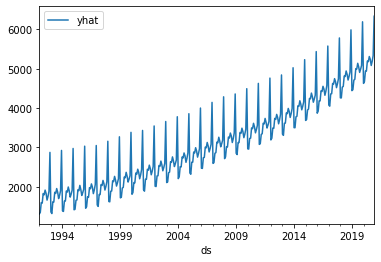

In [21]:
forecast.plot(x='ds',y='yhat')

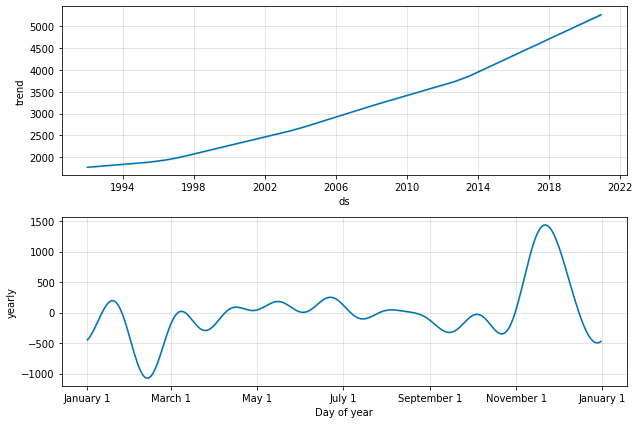

In [22]:
m.plot_components(forecast);
